# 확률과 확률분포

## 확률

- 확률(probability)
    - 어떤 사건(event)이 일어날 가능성
    - 예. 
        - 동전 던지기에서 앞면이 나올 가능성
        - 주사위 던지기에서 특정 눈금이 나올 확률
        - 주식투자에서 이득을 볼 가능성
        
        

- 의사결정
    - 확실성(certainty) 보다는 불확실한 상황에서 이루어지는 경우가 많음
    - 미래에 대한 불확실성의 정도가 더욱 심하다고 할 수 있음 
    - 불확실성 하에서 의사결정의 오류를 줄이기 위해 확률에 대한 연구 필요

### 확률의 기본

- 표본공간과 표본점
- 사상(사건)
- 확률의 정의
    - 객관적 확률(고전적/경험적확률)
    - 주관적 확률
    - 공리적 확률  
- 합사건 / 곱사건
- 상호배반
- 종속사건과 독립사건
- 결합확률 / 주변확률
- 조건부 확률
- 분할
- 전확률의 정리
- 베이즈 정리

## 확률변수와 확률분포

### 확률변수(random variable)
- 실험이나 관찰의 결과 값을 1:1 실수로 대응시키는 함수
- 일정한 확률로 나타나는(발생하는) 사건에 대해 숫자를 부여한 변수

#### 확률변수 구분
- 이산 확률변수(discrete random variable) : 변수가 취할 수 있는 값의 개수가 유한 
- 연속 확률변수(continuous random variable) : 변수가 취할 수 있는 값의 개수가 무한

### 확률분포(probability distribution)

- 확률변수가 취할 수 있는 모든 값에 대해 각각의 확률을 대응시킨 것

#### 확률분포 구분
- 확률질량함수(probability mass function: pmf) : 확률변수가 이산형인 경우
- 확률밀도함수(probability density function: pdf) : 확률변수가 연속형인 경우

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#소수점 이하 자리수 정해주는 것
%precision 3

'%.3f'

#### 1) 공정한 주사위의 확률분포를 구하는 실험

In [3]:
#확률변수 X : 주사위의 눈의 수
dice = [1,2,3,4,5,6]

#확률 P(X=dice)
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
prob

[0.167, 0.167, 0.167, 0.167, 0.167, 0.167]

In [6]:
np.random.seed(0)
np.random.choice(dice, p = prob)

4

In [10]:
num_trial = 100
sample = np.random.choice(dice, size=num_trial, p=prob)
print(len(sample))
sample

100


array([3, 2, 1, 1, 5, 3, 4, 6, 6, 2, 4, 2, 1, 5, 2, 3, 4, 5, 4, 6, 2, 5,
       2, 6, 5, 2, 6, 5, 2, 2, 4, 1, 2, 3, 3, 3, 2, 4, 6, 1, 4, 1, 5, 3,
       4, 2, 1, 3, 3, 6, 5, 5, 6, 1, 4, 4, 6, 2, 2, 1, 1, 6, 5, 5, 2, 4,
       1, 3, 6, 6, 3, 6, 2, 6, 6, 5, 4, 6, 2, 6, 4, 1, 3, 1, 6, 3, 3, 4,
       3, 1, 5, 2, 4, 2, 1, 6, 6, 6, 6, 5])

In [12]:
freq, bins = np.histogram(sample, bins=6, range=(1,7))
freq, bins

(array([15, 19, 15, 15, 14, 22]), array([1., 2., 3., 4., 5., 6., 7.]))

In [13]:
dice_df = pd.DataFrame({'frequency':freq, 'rel_freq': freq/num_trial},
                      index = pd.Index(np.arange(1,7), name='dice'))
dice_df

,frequency,rel_freq
dice,,
1,15,0.15
2,19,0.19
3,15,0.15
4,15,0.15
5,14,0.14
6,22,0.22


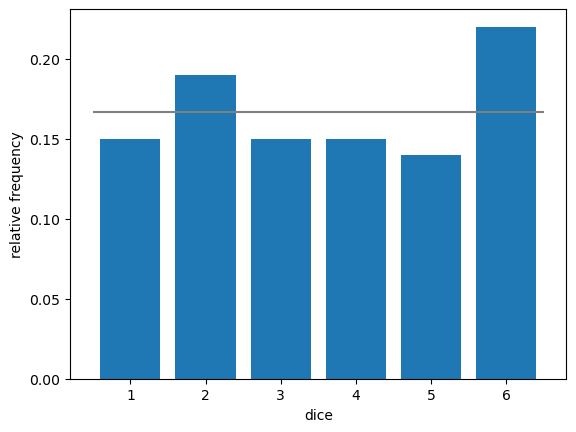

In [20]:
plt.hist(sample, bins=6, range=(1,7), rwidth=0.8, density=True)
plt.xticks(np.linspace(1.5, 6.5, 6), ['1','2','3','4','5','6'])
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.hlines(prob, np.arange(1,7), np.arange(2,8), color='gray')
plt.show()

In [22]:
def draw_dice_hist(num, prob):
    sample = np.random.choice(dice, size=num, p=prob)
    plt.figure(figsize=(6,4))
    plt.hist(sample, bins=6, range=(1,7), rwidth=0.8, density=True)
    plt.xticks(np.linspace(1.5, 6.5, 6), ['1','2','3','4','5','6'])
    plt.xlabel('dice')
    plt.ylabel('relative frequency')
    plt.hlines(prob, np.arange(1,7), np.arange(2,8), color='gray')
    plt.show()

#### 10000번 시도 : 실제 확률분포에 가까워짐

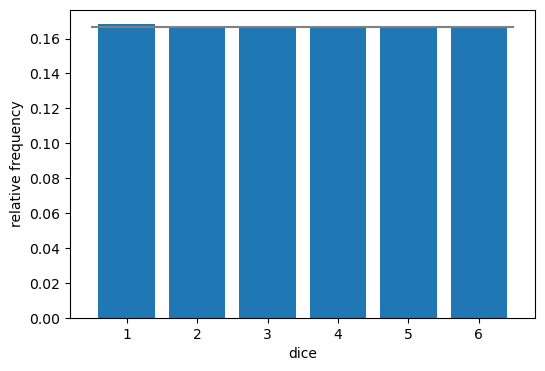

In [23]:
num_trial = 100000
draw_dice_hist(num_trial, prob)

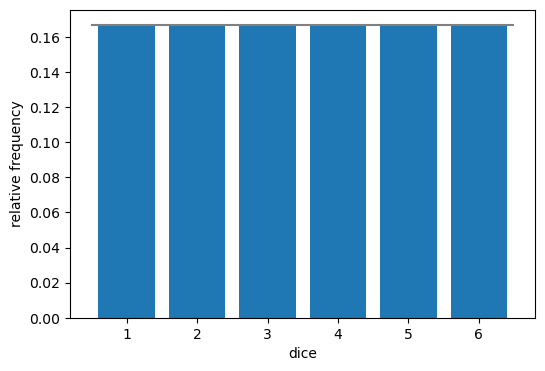

In [24]:
#10만회하면 거의 근사치에 가까워짐
num_trial = 1000000
draw_dice_hist(num_trial, prob)

- 모평균

In [25]:
mu = 0
for x, p in zip(dice, prob):
    mu += x*p
mu

3.500

In [26]:
np.sum([x*p for x, p in zip(dice, prob)])

3.500

In [27]:
np.dot(dice, prob)

3.500

- 표본평균

In [29]:
np.sum(dice_df.index * dice_df.rel_freq)

3.600

#### 2) 불공정한 주사위의 확률분포를 구하는 실험

In [40]:
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [41]:
def make_dice_df(num, prob):
    dice = [1,2,3,4,5,6]
    sample = np.random.choice(dice, size=num, p=prob)
    freq, _ = np.histogram(sample, bins = 6, range=(1,7))
    dice_df = pd.DataFrame({'freq': freq, 'rel_freq':freq/num},
                          index = pd.Index(np.arange(1,7), name='dice'))
    return dice_df

In [42]:
num_trial = 100
make_dice_df(num_trial, prob)

,freq,rel_freq
dice,,
1,1,0.01
2,9,0.09
3,12,0.12
4,15,0.15
5,28,0.28
6,35,0.35


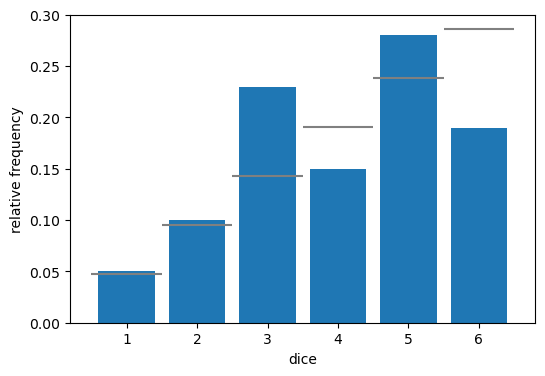

In [43]:
draw_dice_hist(num_trial, prob)

#### 10000번 시도 : 실제 확률분포에 가까워짐

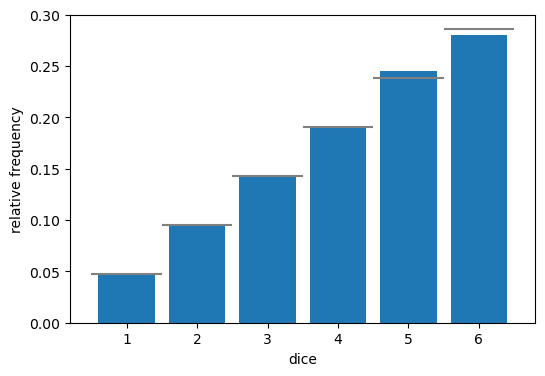

In [44]:
draw_dice_hist(10000, prob)

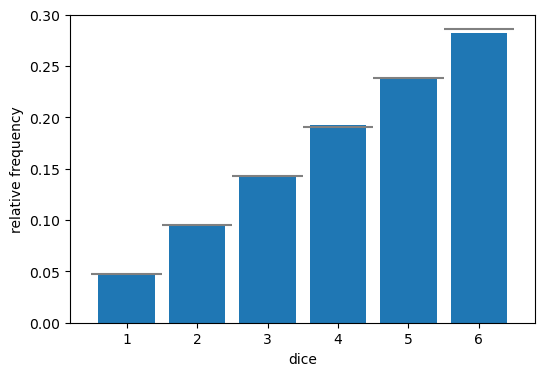

In [45]:
draw_dice_hist(100000, prob)

- 모평균(기대값)

In [46]:
np.dot(dice, prob)

4.333

- 표본평균

In [47]:
dice_df = make_dice_df(100, prob)
dice_df

,freq,rel_freq
dice,,
1,3,0.03
2,11,0.11
3,18,0.18
4,18,0.18
5,23,0.23
6,27,0.27


In [48]:
np.dot(dice_df.index, dice_df.rel_freq)

4.280

## 확률분포의 평균(mean)과 분산(variance)

####  확률분포의 평균(mean)

- 기대값(expected value)
    -  확률 변수의 기대값(${E}$)은 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값 

- 어떤 확률적 사건에 대한 평균의 의미
- ${E(X)}$ 또는 ${μ_X }$ 로 표시
- 이산확률분포의 기대값 : 확률을 가중값으로 사용한 가중평균
- 연속확률분포의 기대값 : 적분개념의 면적
    
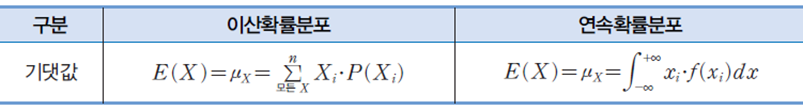


- 모평균(population mean) : ${ μ}$
    - 모집단의 평균

In [49]:
#공정한 주사위 눈에 대한 확률

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return 1/6
    else:
        return 0

In [50]:
list(map(f, x_set))

[0.167, 0.167, 0.167, 0.167, 0.167, 0.167]

In [51]:
x = [x_set, f]
x

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

#### 기대값 함수

In [55]:
def E(X):
    x_set, f = X
    return np.sum([xi*f(xi) for xi in x_set])

In [56]:
E(x)

3.500

In [58]:
def E2(X, g=lambda x:2*x+3):
    x_set, f = X
    return np.sum([g(xi)*f(xi) for xi in x_set])

In [59]:
E2(x)

10.000

#### 확률분포의 분산(variance)

- ${Var(X)}$  표시
- 확률변수의 평균(기대값)으로부터의 편차의 제곱에 대한 기대값으로 계산

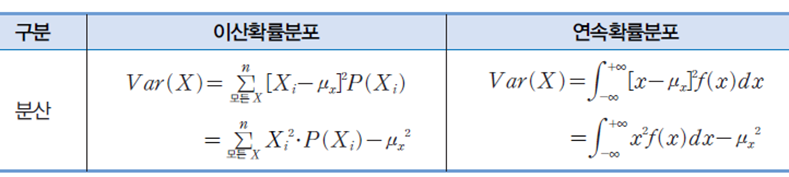


In [60]:
def V(X):
    x_set, f = X
    mu = E(X)
    return np.sum([(xi-mu)**2*f(xi) for xi in x_set])

In [62]:
V(x)

2.917

In [64]:
np.dot(dice, dice)/6 - E(x)**2

2.917

In [65]:
#불공정한 주사위에 대한 확률 분포
def f2(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [66]:
f2(6)

0.286

In [67]:
X2 = [x_set, f2]
X2

[array([1, 2, 3, 4, 5, 6]), <function __main__.f2(x)>]

In [68]:
E(X2)

4.333

In [69]:
V(X2)

2.222

------

In [35]:
from scipy import stats

- https://scipy.org/
- https://docs.scipy.org/doc/scipy/reference/index.html
- https://docs.scipy.org/doc/scipy/reference/stats.html

## 이산형 확률분포

- 베르누이 분포
- 이항분포
- 포아송분포
- 기하분포

### 이항분포(binomial distribution)

- $ X $ ~ $ B(n,p) $

### 0) 연습문제

#### 연습문제1

#### 조합 함수식
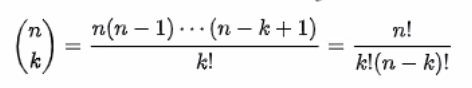

In [17]:
import math

#조합
math.comb(10,2)

45

#### 이항분포 함수식
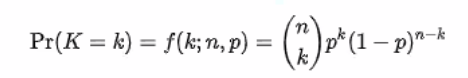

In [18]:
n, p = 10, 0.5

[math.comb(n,x)*p**x*(1-p)**(n-x) for x in range(n+1)]

[0.001, 0.010, 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044, 0.010, 0.001]

In [19]:
def binom_pmf(n,p):
    px = {x:math.comb(n,x)*p**x*(1-p)**(n-x) for x in range(n+1)}
    return px
binom_pmf(10, 0.5)

{0: 0.001,
 1: 0.010,
 2: 0.044,
 3: 0.117,
 4: 0.205,
 5: 0.246,
 6: 0.205,
 7: 0.117,
 8: 0.044,
 9: 0.010,
 10: 0.001}

In [11]:
def perm(n, x):
    permutation = 1
    for i in range(n, n - x, -1):
        permutation *= i
    return permutation

def fact(n):
    factorial = 1
    for i in range(1, n + 1):
        factorial *= i
    return factorial

def probability(x):
    result = (perm(num_trial, x) / fact(x)) * (1 - prob) ** (num_trial - x) * prob ** x
    return result

prob = 0.5
num_trial = 10
fx=list()

for x in range(num_trial + 1):
    fx.append([x,probability(x)])

table_x = pd.DataFrame(fx, columns=['success','prob'], index=range(num_trial + 1))
table_x

,success,prob
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117188
8,8,0.043945
9,9,0.009766


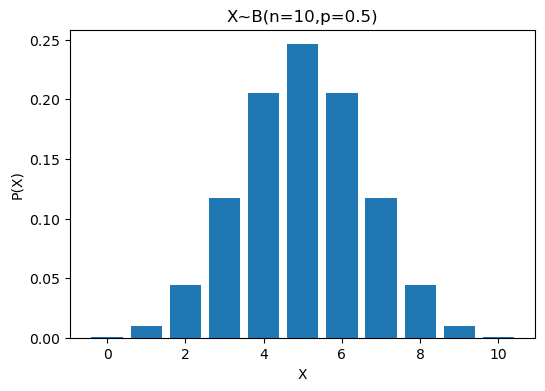

In [30]:
def draw_binom_pmf(n,p):
    px = binom_pmf(n,p)
    pmf = pd.DataFrame.from_dict(px, orient='index', columns=['P(X)'])
    plt.figure(figsize=(6,4))
    plt.bar(pmf.index, pmf['P(X)'])
    plt.title(f'X~B(n={n},p={p})')
    plt.xlabel('X')
    plt.ylabel('P(X)')
    plt.show()
    return pmf
    
pmf = draw_binom_pmf(n,p)

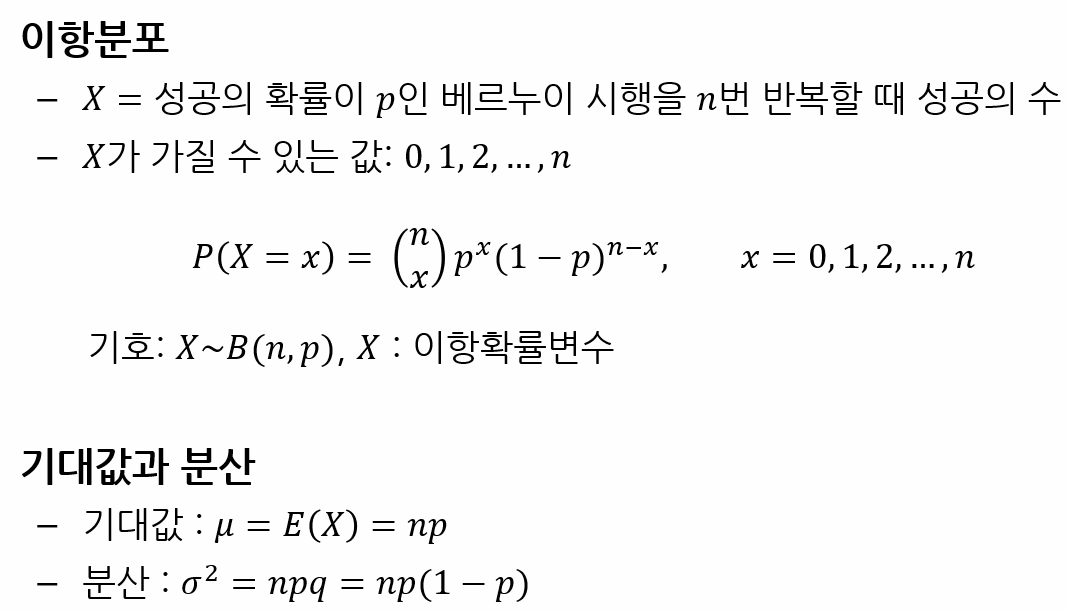

In [21]:
# X에 대한 기댓값과 분산을 계산하시오.
#기대값
Ex = n * p
#분산
Var = n*p*(1-p)
print(f'X~B(n={n}, p={p})의 E(X)={Ex}, Var(X)={Var}')

X~B(n=10, p=0.5)의 E(X)=5.0, Var(X)=2.5


In [31]:
#기대값 (모평균)
np.dot(pmf.index, pmf['P(X)'])

5.000

In [32]:
# 모분산
np.dot((pmf.index-Ex)**2, pmf['P(X)'])

2.500

In [33]:
#분산
np.dot(pmf.index**2, pmf['P(X)']) - Ex ** 2

2.500

In [34]:
# 누적확률 P(X≤5)을 계산하시오.
def binom_cdf(n, p):
    px = binom_pmf(n,p)
    return np.cumsum(list(px.values()))
binom_cdf(n,p)

array([9.766e-04, 1.074e-02, 5.469e-02, 1.719e-01, 3.770e-01, 6.230e-01,
       8.281e-01, 9.453e-01, 9.893e-01, 9.990e-01, 1.000e+00])

In [35]:
cdf = pd.DataFrame(binom_cdf(n,p), index = pd.Index(np.arange(n+1), name='X'),
            columns=['F(X)'])
cdf

,F(X)
X,
0,0.000977
1,0.010742
2,0.054688
3,0.171875
4,0.376953
5,0.623047
6,0.828125
7,0.945312
8,0.989258


In [36]:
cdf.loc[5]

F(X)    0.623047
Name: 5, dtype: float64

#### 연습문제2

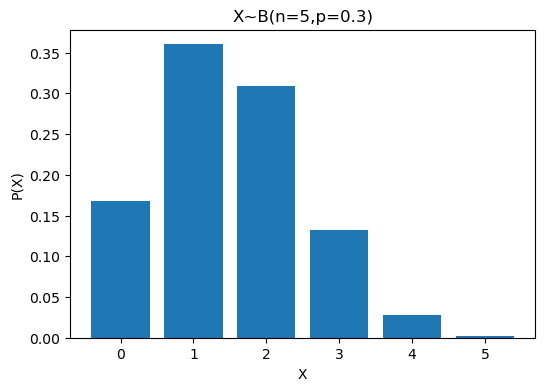

,P(X)
0,0.16807
1,0.36015
2,0.30870
3,0.13230
4,0.02835
5,0.00243


In [56]:
draw_binom_pmf(n=5, p=0.3)

In [37]:
binom_cdf(n=5, p=0.3)

array([0.168, 0.528, 0.837, 0.969, 0.998, 1.   ])

In [40]:
pd.DataFrame(binom_cdf(n=5,p=0.3), index = pd.Index(np.arange(5+1), name='X'),
            columns=['F(X)'])

,F(X)
X,
0,0.16807
1,0.52822
2,0.83692
3,0.96922
4,0.99757
5,1.00000


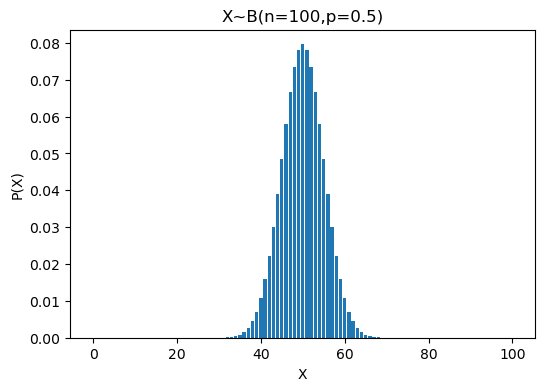

,P(X)
0,7.888609e-31
1,7.888609e-29
2,3.904861e-27
3,1.275588e-25
4,3.093301e-24
...,...
96,3.093301e-24
97,1.275588e-25
98,3.904861e-27
99,7.888609e-29


In [41]:
draw_binom_pmf(n=100, p=0.5)

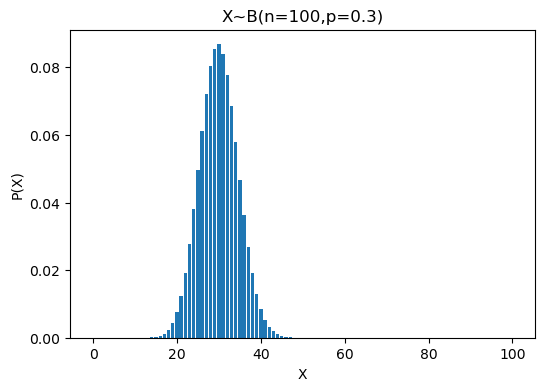

,P(X)
0,3.234477e-16
1,1.386204e-14
2,2.940733e-13
3,4.117027e-12
4,4.278767e-11
...,...
96,5.990380e-45
97,1.058683e-46
98,1.388942e-48
99,1.202548e-50


In [42]:
draw_binom_pmf(n=100, p=0.3)

In [45]:
n, p = 100, 0.5
pd.DataFrame(binom_cdf(n,p), index = pd.Index(np.arange(n+1), name='X'),
            columns=['F(X)'])

,F(X)
X,
0,7.888609e-31
1,7.967495e-29
2,3.984536e-27
3,1.315433e-25
4,3.224844e-24
...,...
96,1.000000e+00
97,1.000000e+00
98,1.000000e+00


**scipy.stat 모듈의 API**

In [46]:
from scipy import stats

In [49]:
n,p = 10, 0.5
rv = stats.binom(n,p) #random variable
rv

In [50]:
rv.pmf(np.arange(n+1))

array([0.001, 0.01 , 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044,
       0.01 , 0.001])

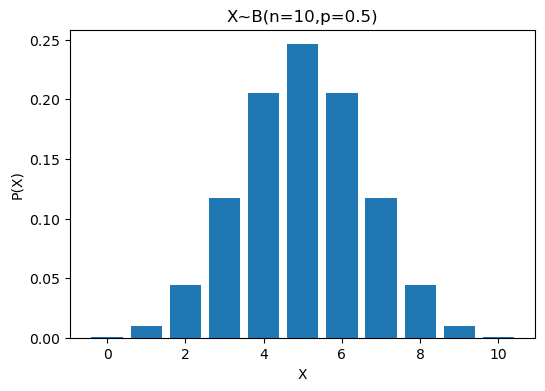

In [52]:
def draw_binom_pmf2(n,p):
    rv = stats.binom(n,p)
    x_set = np.arange(n+1)
    plt.figure(figsize=(6,4))
    plt.bar(x_set, rv.pmf(x_set))
    plt.title(f'X~B(n={n},p={p})')
    plt.xlabel('X')
    plt.ylabel('P(X)')
    plt.show()
    return pmf
    
pmf = draw_binom_pmf2(n,p)

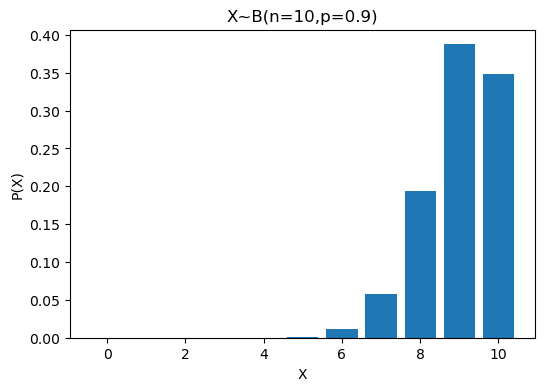

In [53]:
pmf = draw_binom_pmf2(n,p=0.9)

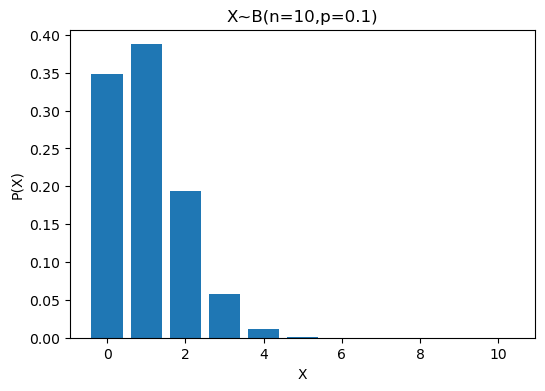

In [54]:
pmf = draw_binom_pmf2(n,p=0.1)

In [58]:
#scipy.stats 모듈의 binom().stats() : 기대값, 분산
rv.stats()

(5.000, 2.500)

In [59]:
rv.median(), rv.mean(), rv.var() #중앙값, 평균, 분산

(5.000, 5.000, 2.500)

#### 연습문제3

In [61]:
#scipy.stats.binom().ppf()를 이용

n, p = 100, 0.5
rv2 = stats.binom(n,p)
rv2.ppf(0.9) #0.9에 해당되는 확률값을 구해줌

7.000

### 포아송 분포

- 단위시간(면적,공간) 동안 발생하는 사건의 수의 분포
- 모수 : λ  (람다 - 평균발생회수)
- 확률변수 X >= 0, X={0,1,2,...}
- 확률함수 : $ {λ^x e^{-λ}} \over x! $
- 기대값(모평균 μ) = λ
- 분산 = λ
- λ가 커질수록 정규분포를 따름
- scipy.stats.poisson(λ)

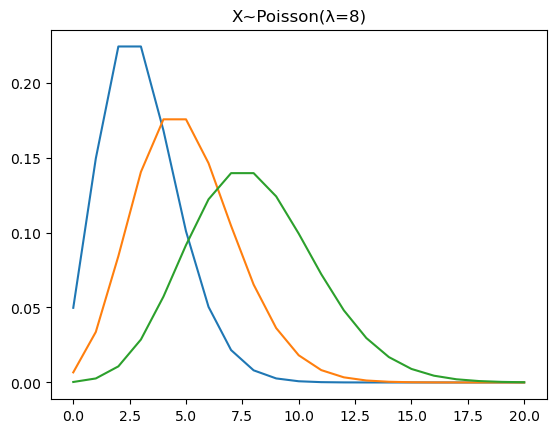

In [70]:
x_set = list(range(21))
for lambda_ in [3,5,8]:
    poi_rv = stats.poisson(lambda_)
    px = poi_rv.pmf(x_set)
    plt.plot(x_set, px)
    plt.title(f'X~Poisson(λ={lambda_})')
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

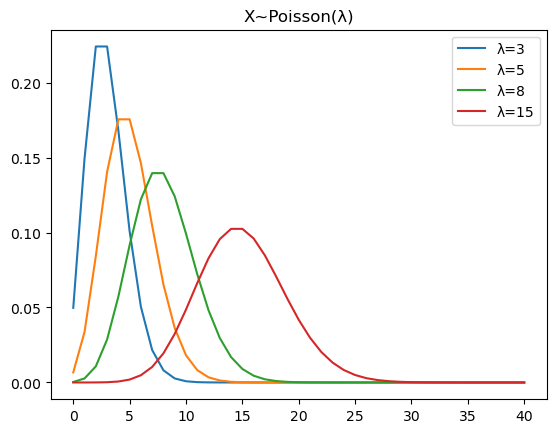

In [74]:
x_set = list(range(41))
for lambda_ in [3,5,8,15]:
    poi_rv = stats.poisson(lambda_)
    px = poi_rv.pmf(x_set)
    plt.plot(x_set, px, label = f'λ={lambda_}')

plt.title(f'X~Poisson(λ)')
plt.legend()
plt.show

## 연속형 확률분포

- 정규분포
- t분포
- 카이제곱분포
- F분포

### 정규분포

$ X $ ~ $ N( \mu , \sigma^2 ) $ 

- 가우지안 분포
- 평균과 분산에 의해 모양이 결정
- 좌우대칭, 종모양
- 현실 데이터의 분포
- 모수 : 평균, 분산, $σ^2$
- 확률함수 : $ {1 \over {σ \sqrt{2 \pi}}} e^{ - (x- \mu )^2  \over 2 \sigma^2 }$
- 확률변수: 모든 실수구간 $ (- ∞, + ∞) $
- scipy.stats.norm($\mu$, σ)

<function matplotlib.pyplot.show(close=None, block=None)>

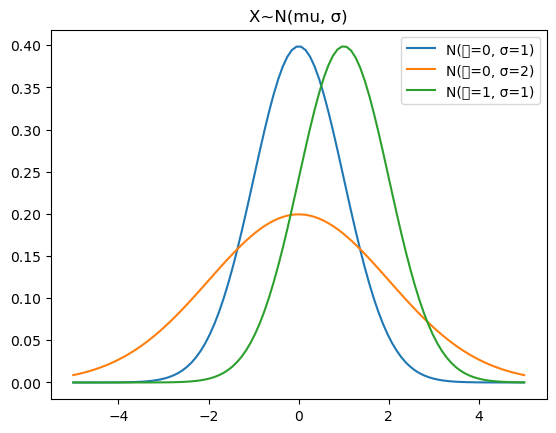

In [77]:
x_set = np.linspace(-5, 5, 100)
for mu, sigma in [(0,1), (0,2), (1,1)]:
    rv = stats.norm(mu, sigma)
    fx = rv.pdf(x_set)
    plt.plot(x_set, fx, label = f'N(𝜇={mu}, σ={sigma})')

plt.title(f'X~N(mu, σ)')
plt.legend()
plt.show

표준 정규분포 Z~N(0,1)

$ Z = { {x - \mu} \over \sigma }$

문제. 어느 과목의 시험을 더 잘 본 것인가?

어느 학생이 수학 시험은 80점, 영어 시험은 85점을 받았다고 할 때, 어느 과목을 더 잘했다고 볼 수 있을까요?

|과목|분포|표준화|환산점수|
|---|---|---|---|
|수학|$N(60, 10^2)$|$Z=(80-60)/10$|2|
|영어|$N(80, 5^2)$|$Z=(85-80)/5$|1|

=> 환산 점수가 수학이 더 높아 수학과목을 더 잘한 것이다

**$P(-1.5<=Z<=1.5)=?)$**

$P(Z<=1.5)-P(Z<=-1.5)$

**scipy.stats의 norm() 함수**

In [79]:
norm_rv = stats.norm(0,1)
norm_rv.cdf(1.5), norm_rv.cdf(-1.5)

(0.933, 0.067)

In [80]:
norm_rv.cdf(1.5) - norm_rv.cdf(-1.5)

0.866

$P(0<=Z<=k) = 0.4$을 만족하는 K는?

In [81]:
norm_rv.cdf(0.4) - norm_rv.cdf(0)

0.155

In [84]:
#ppf / pmf, pdf, cdf, ...
norm_rv.ppf(0.9) 

1.282

0.5 + 0.4 = 0.9
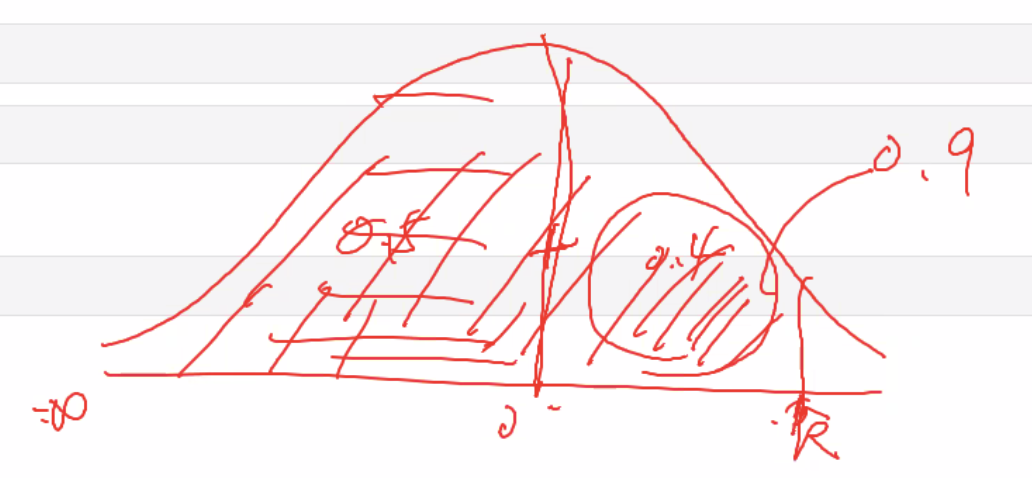

### t분포

- student's t 분포 (Gosset)
- 소표본(n < 30) 검정에서 정규분포를 대신해서 사용
- 두 집단의 평균차이 검정, 한 집단의 모평균 추정/검정
- 좌우대칭, 정규분포 보다 가운데 봉우리 조금 낮음, 꼬리 부분이 더 두텁다
- scipy.stats.t(df) #degree of freedom 자유도
- 자유도(degree of freedom)에 의해 모양이 결정
- 자유가 커질수록 정규분포에 근사

<function matplotlib.pyplot.show(close=None, block=None)>

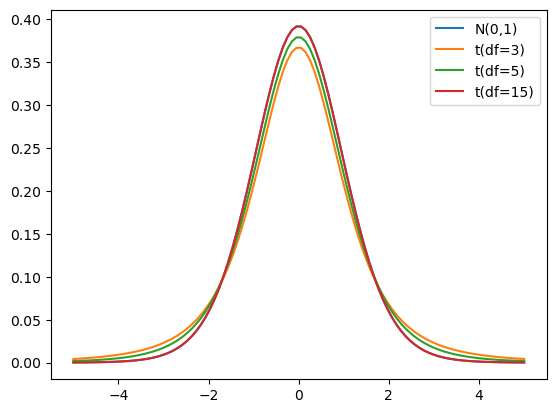

In [90]:
x_set = np.linspace(-5, 5, 100)
norm_rv = stats.norm(0,1)
norm_fx = norm_rv.pdf(x_set)
plt.plot(x_set, fx, label=f'N(0,1)')

for df in [3,5,15]:
    rv = stats.t(df)
    fx = rv.pdf(x_set)
    plt.plot(x_set, fx, label = f't(df={df})')

plt.legend()
plt.show

-----